<a href="https://colab.research.google.com/github/RFajardoMonzon/MachineLearningCourse/blob/master/Pretrained_Models_Modelos_Preentrenados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 13 - Modelos Preentrenados.

*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1.Como perros y gatos.

Tranquilo, controla la emoción. Hoy... no trabajaremos con el dataset de números. Larga vida al **MNIST.** Por el contrario trabajaremos con un dataset un poco más grande, así que más importante que nunca ***recuerda activar el procesamiento con GPU***.

Este dataset será uno que incluye imágenes de perros y gatos, y lo que tendremos que diseñar será un clasificador capaz de diferenciar entre ambas clases. Para ello, lo primero que deberás de hacer es ejecutar la celda que tienes abajo, que será la que te descargue el dataset con el que trabajaremos.

---

**Tarea:** El trabajo de hoy consistirá en lo siguiente:

- Carga tus datos para entrenar el modelo haciendo uso de los* ImageDataGenerator(...)*
- Comprueba que tus clases están balanceadas, y visualiza alguna de las imágenes para ambas clases.
- Genera una arquitectura convolucional que aprenda a clasificar tus imágenes. Un *accuracy* superior al 70% es aceptable. Haz uso de capaz de ***BatchNormalization()*** para agilizar el entrenamiento. Cuando lo tengas entrenado, guárda el modelo y descárgalo en tu ordenador para que lo puedas recuperar.
- Una vez tengas tu red entrenada, utiliza un modelo preentrenado (e.g. ResNet50) y utilízalo de la manera más conveniente para agilizar y mejorar el aprendizaje de tu problema.

**Hint:** En esta web podrás encontrar un tutorial quasi-igual a lo que vamos a trabajar hoy. No copies el código que no entiendas, pero úsalo para guiarte:
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [0]:
# Ejecuta esto para descargarte el dataset. Podrás encontrar los archivos en el
# directorio correspondiente en la pestaña de Archivos en el menú de la izquierda.

!wget --no-check-certificate \
 https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
 -O ./cats_and_dogs_filtered.zip
  
!unzip cats_and_dogs_filtered.zip

--2019-05-29 15:03:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M   103MB/s    in 0.6s    

2019-05-29 15:03:26 (103 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg 

In [0]:
modelN = 1

(374, 500, 3)


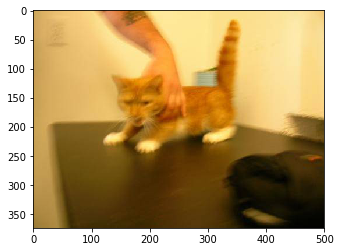

In [0]:
from tensorflow.keras.preprocessing.image   import load_img, img_to_array
from matplotlib.pyplot import imshow
img = load_img("cats_and_dogs_filtered/train/cats/cat.0.jpg")
print(img_to_array(img).shape)
imshow(img)


In [0]:
import tensorflow as tf

from tensorflow.keras.models                import Sequential, Model
from tensorflow.keras.layers                import Dense, Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers                import Conv2DTranspose, UpSampling2D, MaxPooling2D, Reshape, Activation, ReLU
from tensorflow.keras.preprocessing.image   import ImageDataGenerator
from tensorflow.keras.utils                 import to_categorical
from tensorflow.keras.optimizers            import SGD

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

im_size = 150

batch_size = 40

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'cats_and_dogs_filtered/train',  # this is the target directory
        target_size=(im_size, im_size),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'cats_and_dogs_filtered/validation',
        target_size=(im_size, im_size),
        batch_size=batch_size,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:


# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

inp = Input(shape=(im_size, im_size, 3))

x = Conv2D(32, (3, 3), strides=2)(inp)
# x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(64, (3, 3), strides=2)(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(128, (3, 3), strides=2)(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(256, (3, 3), strides=2)(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Flatten()(x)

x = Dense(64, activation="relu")(x)

x = Dense(1, activation="sigmoid")(x)

model = Model(inputs=inp, outputs=x)

model.compile(loss='binary_crossentropy',
              optimizer=SGD(0.2),
              metrics=['accuracy'])


model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save('conv{}.h5'.format(modelN))  # always save your weights after training or during training
modelN += 1

Epoch 1/50
50/50 [==============================] - 17s 339ms/step - loss: 0.6939 - acc: 0.4965 - val_loss: 0.6920 - val_acc: 0.5030
Epoch 2/50
50/50 [==============================] - 15s 302ms/step - loss: 0.6934 - acc: 0.5085 - val_loss: 0.6900 - val_acc: 0.5770
Epoch 3/50
50/50 [==============================] - 15s 296ms/step - loss: 0.6881 - acc: 0.5395 - val_loss: 0.6846 - val_acc: 0.5550
Epoch 4/50
50/50 [==============================] - 15s 307ms/step - loss: 0.6863 - acc: 0.5575 - val_loss: 0.6828 - val_acc: 0.5340
Epoch 5/50
50/50 [==============================] - 16s 312ms/step - loss: 0.6835 - acc: 0.5675 - val_loss: 0.6826 - val_acc: 0.5490
Epoch 6/50
50/50 [==============================] - 15s 295ms/step - loss: 0.6729 - acc: 0.5840 - val_loss: 0.6754 - val_acc: 0.5720
Epoch 7/50
50/50 [==============================] - 14s 289ms/step - loss: 0.6839 - acc: 0.5540 - val_loss: 0.6769 - val_acc: 0.5690
Epoch 8/50
50/50 [==============================] - 15s 296ms/step - 

In [0]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
# from keras.backend import clear_session

# clear_session()

resNetModel = ResNet50(include_top=False, weights='imagenet',
                       input_shape=(im_size, im_size, 3))

batch_size = 40

# x = Flatten()(resNetModel)
# x = Dense(128, activation="relu")(x)
# x = Dense(1, activation="sigmoid")(x)

# extModel = Model(inputs=resNetModel.input, outputs=x)

resNetModel.trainable = False





/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [0]:
extModel= Sequential()

extModel.add(resNetModel)
extModel.add(Flatten())
extModel.add(Dense(1, activation="sigmoid"))

extModel.summary()

extModel.compile(loss='binary_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

extModel.fit_generator(
        train_generator,
        epochs=50,
        validation_data=validation_generator)

extModel.save('resnet.h5')  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51201     
Total params: 23,638,913
Trainable params: 51,201
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 20s 397ms/step - loss: 0.9896 - acc: 0.8515 - val_loss: 0.7418 - val_acc: 0.5020
Epoch 2/50
50/50 [==============================] - 19s 378ms/step - loss: 0.4457 - acc: 0.9225 - val_loss: 1.9214 - val_acc: 0.5000
Epoch 3/50
50/50 [==============================] - 17s 339ms/step - loss: 0.4593 - acc: 0.9295 - val_loss: 7.5781 - val_ac